In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Assignment_1/data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(107619, 9)

In [4]:
data.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [5]:
data.time_period.unique()

array([nan])

In [6]:
data.time_period_type.unique()

array([nan])

In [7]:
data.location_type.unique()

array(['province', 'state', 'region', 'municipality', nan, 'country',
       'county', 'department', 'Department', 'district', 'city',
       'territory'], dtype=object)

In [8]:
data.isnull().sum()

report_date              7
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  138
unit                     7
dtype: int64

In [9]:
data.loc[[2019]]

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
2019,2016-02-13,Brazil-Amazonas,state,microcephaly_under_investigation,BR0001,NaN,NaN,NaN,cases


In [10]:
data = data.loc[ ~( data.isnull().sum(axis=1) == len(data.columns) ) ]

In [11]:
data.loc[ data['location_type'].isnull() ]

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit


In [12]:
data.drop(columns=['time_period','time_period_type'],inplace=True)

In [13]:
data.loc[ ( (data['location']=='Argentina-CABA') | (data['location']=='Argentina-Catamarca') ) & (data['value'] != '0') ]

,report_date,location,location_type,data_field,data_field_code,value,unit
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
10,2016-03-19,Argentina-CABA,province,cumulative_cases_under_study,AR0005,68,cases
11,2016-03-19,Argentina-CABA,province,cumulative_cases_discarded,AR0006,1,cases
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
152,2016-03-26,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
154,2016-03-26,Argentina-CABA,province,cumulative_cases_under_study,AR0005,81,cases
155,2016-03-26,Argentina-CABA,province,cumulative_cases_discarded,AR0006,2,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
296,2016-04-02,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
298,2016-04-02,Argentina-CABA,province,cumulative_cases_under_study,AR0005,83,cases


In [14]:
len(data)

107612

In [15]:
len(data.dropna())

107481

# Question 1

In [16]:
data.loc[ (data['location'] == 'Argentina-Catamarca') & (data['data_field_code'] == 'AR0005') ]

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


# Question 2

In [31]:
arg_cat = data.loc[ (data['location'] == 'Argentina-Catamarca') & ( data['unit'] == 'cases' ) ]
arg_cab = data.loc[ (data['location'] == 'Argentina-CABA') & ( data['unit'] == 'cases' ) ]

In [32]:
arg_cat['value'] = arg_cat['value'].apply(pd.to_numeric)
arg_cab['value'] = arg_cab['value'].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
arg_cat = arg_cat.groupby('report_date',as_index=False).sum()
arg_cab = arg_cab.groupby('report_date',as_index=False).sum()

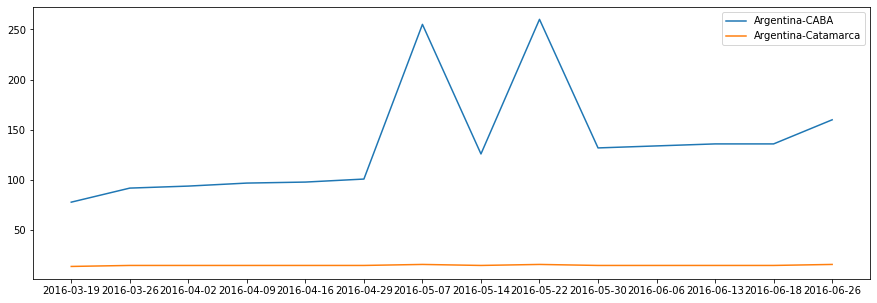

In [36]:
plt.figure(figsize=(15,5))
plt.plot(arg_cab['report_date'],arg_cab['value'],label='Argentina-CABA')
plt.plot(arg_cat['report_date'],arg_cat['value'],label='Argentina-Catamarca')
plt.legend()
plt.show()

# Question 3

In [83]:
arg_cab = data.loc[ data['location'] == 'Argentina-CABA' ]
arg_cat = data.loc[ data['location'] == 'Argentina-Catamarca' ]
arg_bua = data.loc[ data['location'] == 'Argentina-Buenos_Aires' ]

In [84]:
arg_cab['value'] = arg_cab['value'].apply(pd.to_numeric)
arg_cat['value'] = arg_cat['value'].apply(pd.to_numeric)
arg_bua['value'] = arg_bua['value'].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [85]:
arg_cat = arg_cat.groupby('data_field').sum().value
arg_cab = arg_cab.groupby('data_field').sum().value
arg_bua = arg_bua.groupby('data_field').sum().value
ind = np.arange(len(arg_bua))

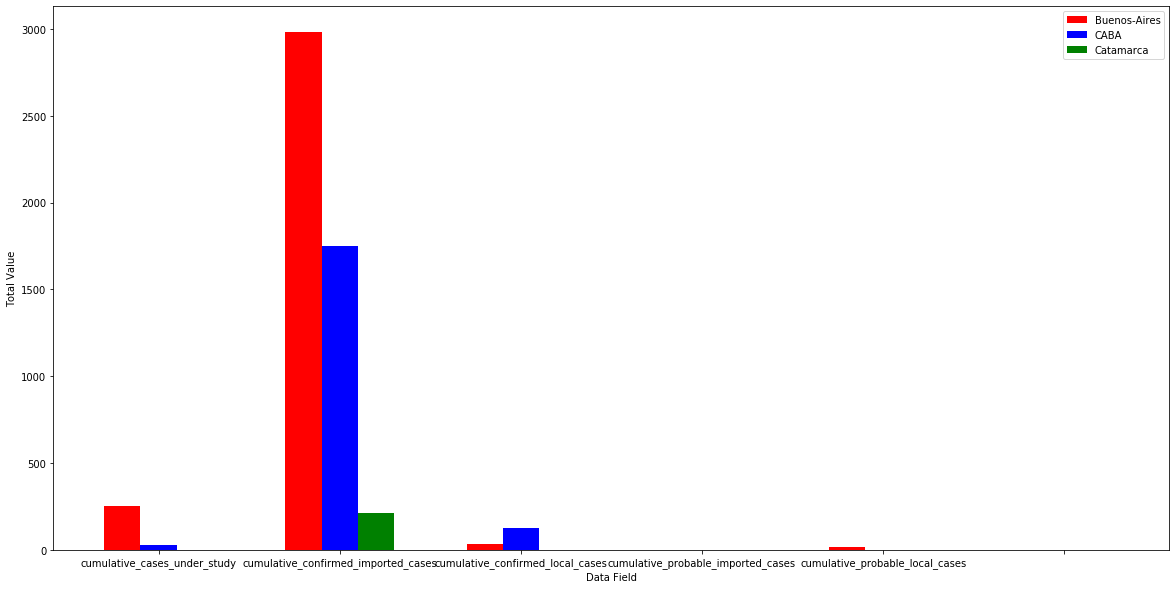

In [111]:
plt.figure(figsize=(20,10))
sub = plt.subplot()
sub.bar(ind-0.2,arg_bua, width=0.2,color='r',align='center',label='Buenos-Aires')
sub.bar(ind,arg_cab, width=0.2,color='b',align='center',label='CABA')
sub.bar(ind+0.2,arg_cat, width=0.2,color='g',align='center',label='Catamarca')
sub.set_xticklabels(arg_cat.index)
plt.xlabel('Data Field')
plt.ylabel('Total Value')
plt.legend()


plt.show()